In [13]:
import cv2
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


In [14]:
imageSize = 64
test_data_dir = "C:/Users/sppol/Documents/Ai_deeplearning/BaseLine_Dataset/test"

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=24,
    color_mode="grayscale",
    shuffle=False,
#     class_mode='categorical',
    classes=['Normal','Diseases']
   
    ) # set as test data

Found 368 images belonging to 2 classes.


In [16]:
from keras.models import load_model
teeth = load_model('BaseLineTeeth(2).h5')

In [17]:
# print(test_generator.classes)

In [18]:
test = teeth.predict_generator(test_generator, steps = 16, verbose=0)
test = np.argmax(test, axis=1)

# print(test);
# print((test_generator.classes));
# print(len(test))
# print(len(test))

In [19]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Diseases']
print(classification_report(test_generator.classes, test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       142
    Diseases       0.97      0.93      0.95       226

    accuracy                           0.94       368
   macro avg       0.94      0.95      0.94       368
weighted avg       0.94      0.94      0.94       368



In [20]:
import pandas as pd
test_generator.reset

df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict':test[:],
    'classes':test_generator.classes
    
})

In [21]:
pd.set_option('display.float_format', lambda x: '%.5' % x)
df['predict'] = df['predict']>0.5
df.predict = df.predict.astype(int)


In [22]:
misclassified = df[df['predict']!=df['classes']]
print('Total misclassified image from 320 test images : %d'%misclassified['classes'].count())

Total misclassified image from 320 test images : 21


In [23]:
df

,filename,predict,classes
0,Normal\Thidar หญิง 23_1.bmp,0,0
1,Normal\Thidar หญิง 23_2.bmp,0,0
2,Normal\Thidar หญิง 23_3.bmp,0,0
3,Normal\Thidar หญิง 23_4.bmp,0,0
4,Normal\Thidar หญิง 23_5.bmp,0,0
...,...,...,...
363,Diseases\เทวาฤทธิ์ ชาย 53_5.jpg,1,1
364,Diseases\แดง ชาย 56_1.jpg,1,1
365,Diseases\แดง ชาย 56_3.jpg,1,1
366,Diseases\แดง ชาย 56_4.jpg,1,1


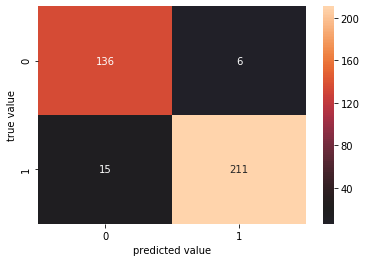

In [24]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.classes,df.predict)
sns.heatmap(conf_matrix,fmt='g',annot=True,center=20);
plt.xlabel('predicted value')
plt.ylabel('true value');

